# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [2]:
dataset = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

   8192/Unknown 0s 18us/step

'C:\\Users\\jonam\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [4]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

# Importar el dataset usando pandas
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

# Mostrar las primeras filas del dataset
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


### Limpia los datos

Trata los missings y variables categóricas

In [7]:
# 1. Tratar los valores faltantes
print("Valores faltantes antes de la limpieza:")
print(dataset.isnull().sum()) #Nos damos cuenta que en la variable Horsepower hay 6 valores faltantes.

Valores faltantes antes de la limpieza:
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [8]:
# Rellenamos los valores faltantes de 'Horsepower' con la mediana
dataset['Horsepower'] = dataset['Horsepower'].fillna(dataset['Horsepower'].median())

print("\nValores faltantes después de la limpieza:")
print(dataset.isnull().sum())


Valores faltantes después de la limpieza:
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [9]:
# 2. Tratamos las variables categóricas

# Convertimos 'Origin' a una variable categórica
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [13]:
# Mostrar las primeras filas y la información del dataset limpio
print("\nPrimeras filas del dataset limpio:")
dataset.head()
print("\nInformación del dataset limpio:")
dataset.info()


Primeras filas del dataset limpio:

Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MPG            398 non-null    float64
 1   Cylinders      398 non-null    int64  
 2   Displacement   398 non-null    float64
 3   Horsepower     398 non-null    float64
 4   Weight         398 non-null    float64
 5   Acceleration   398 non-null    float64
 6   Model Year     398 non-null    int64  
 7   Origin_Europe  398 non-null    bool   
 8   Origin_Japan   398 non-null    bool   
 9   Origin_USA     398 non-null    bool   
dtypes: bool(3), float64(5), int64(2)
memory usage: 23.1 KB


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [15]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split

X = dataset.drop('MPG', axis=1)
y = dataset['MPG']

#Dividimos los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creamos dos datasets separados para entrenamiento y prueba.
train_dataset = pd.concat([X_train, y_train], axis=1)
test_dataset = pd.concat([X_test, y_test], axis=1)

#Mostramos las formas de los conjuntos de datos.
print("Forma del conjunto de entrenamiento:", train_dataset.shape)
print("Forma del conjunto de prueba:", test_dataset.shape)

#Mostramos las primeras filas de cada conjunto.
print("\nPrimeras filas del conjunto de entrenamiento:")
train_dataset.head()
print("\nPrimeras filas del conjunto de prueba:")
test_dataset.head()

Forma del conjunto de entrenamiento: (318, 10)
Forma del conjunto de prueba: (80, 10)

Primeras filas del conjunto de entrenamiento:

Primeras filas del conjunto de prueba:


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA,MPG
198,4,91.0,53.0,1795.0,17.4,76,False,True,False,33.0
396,4,120.0,79.0,2625.0,18.6,82,False,False,True,28.0
33,6,232.0,100.0,2634.0,13.0,71,False,False,True,19.0
208,8,318.0,150.0,3940.0,13.2,76,False,False,True,13.0
93,8,318.0,150.0,4237.0,14.5,73,False,False,True,14.0


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

<Figure size 1200x1000 with 0 Axes>

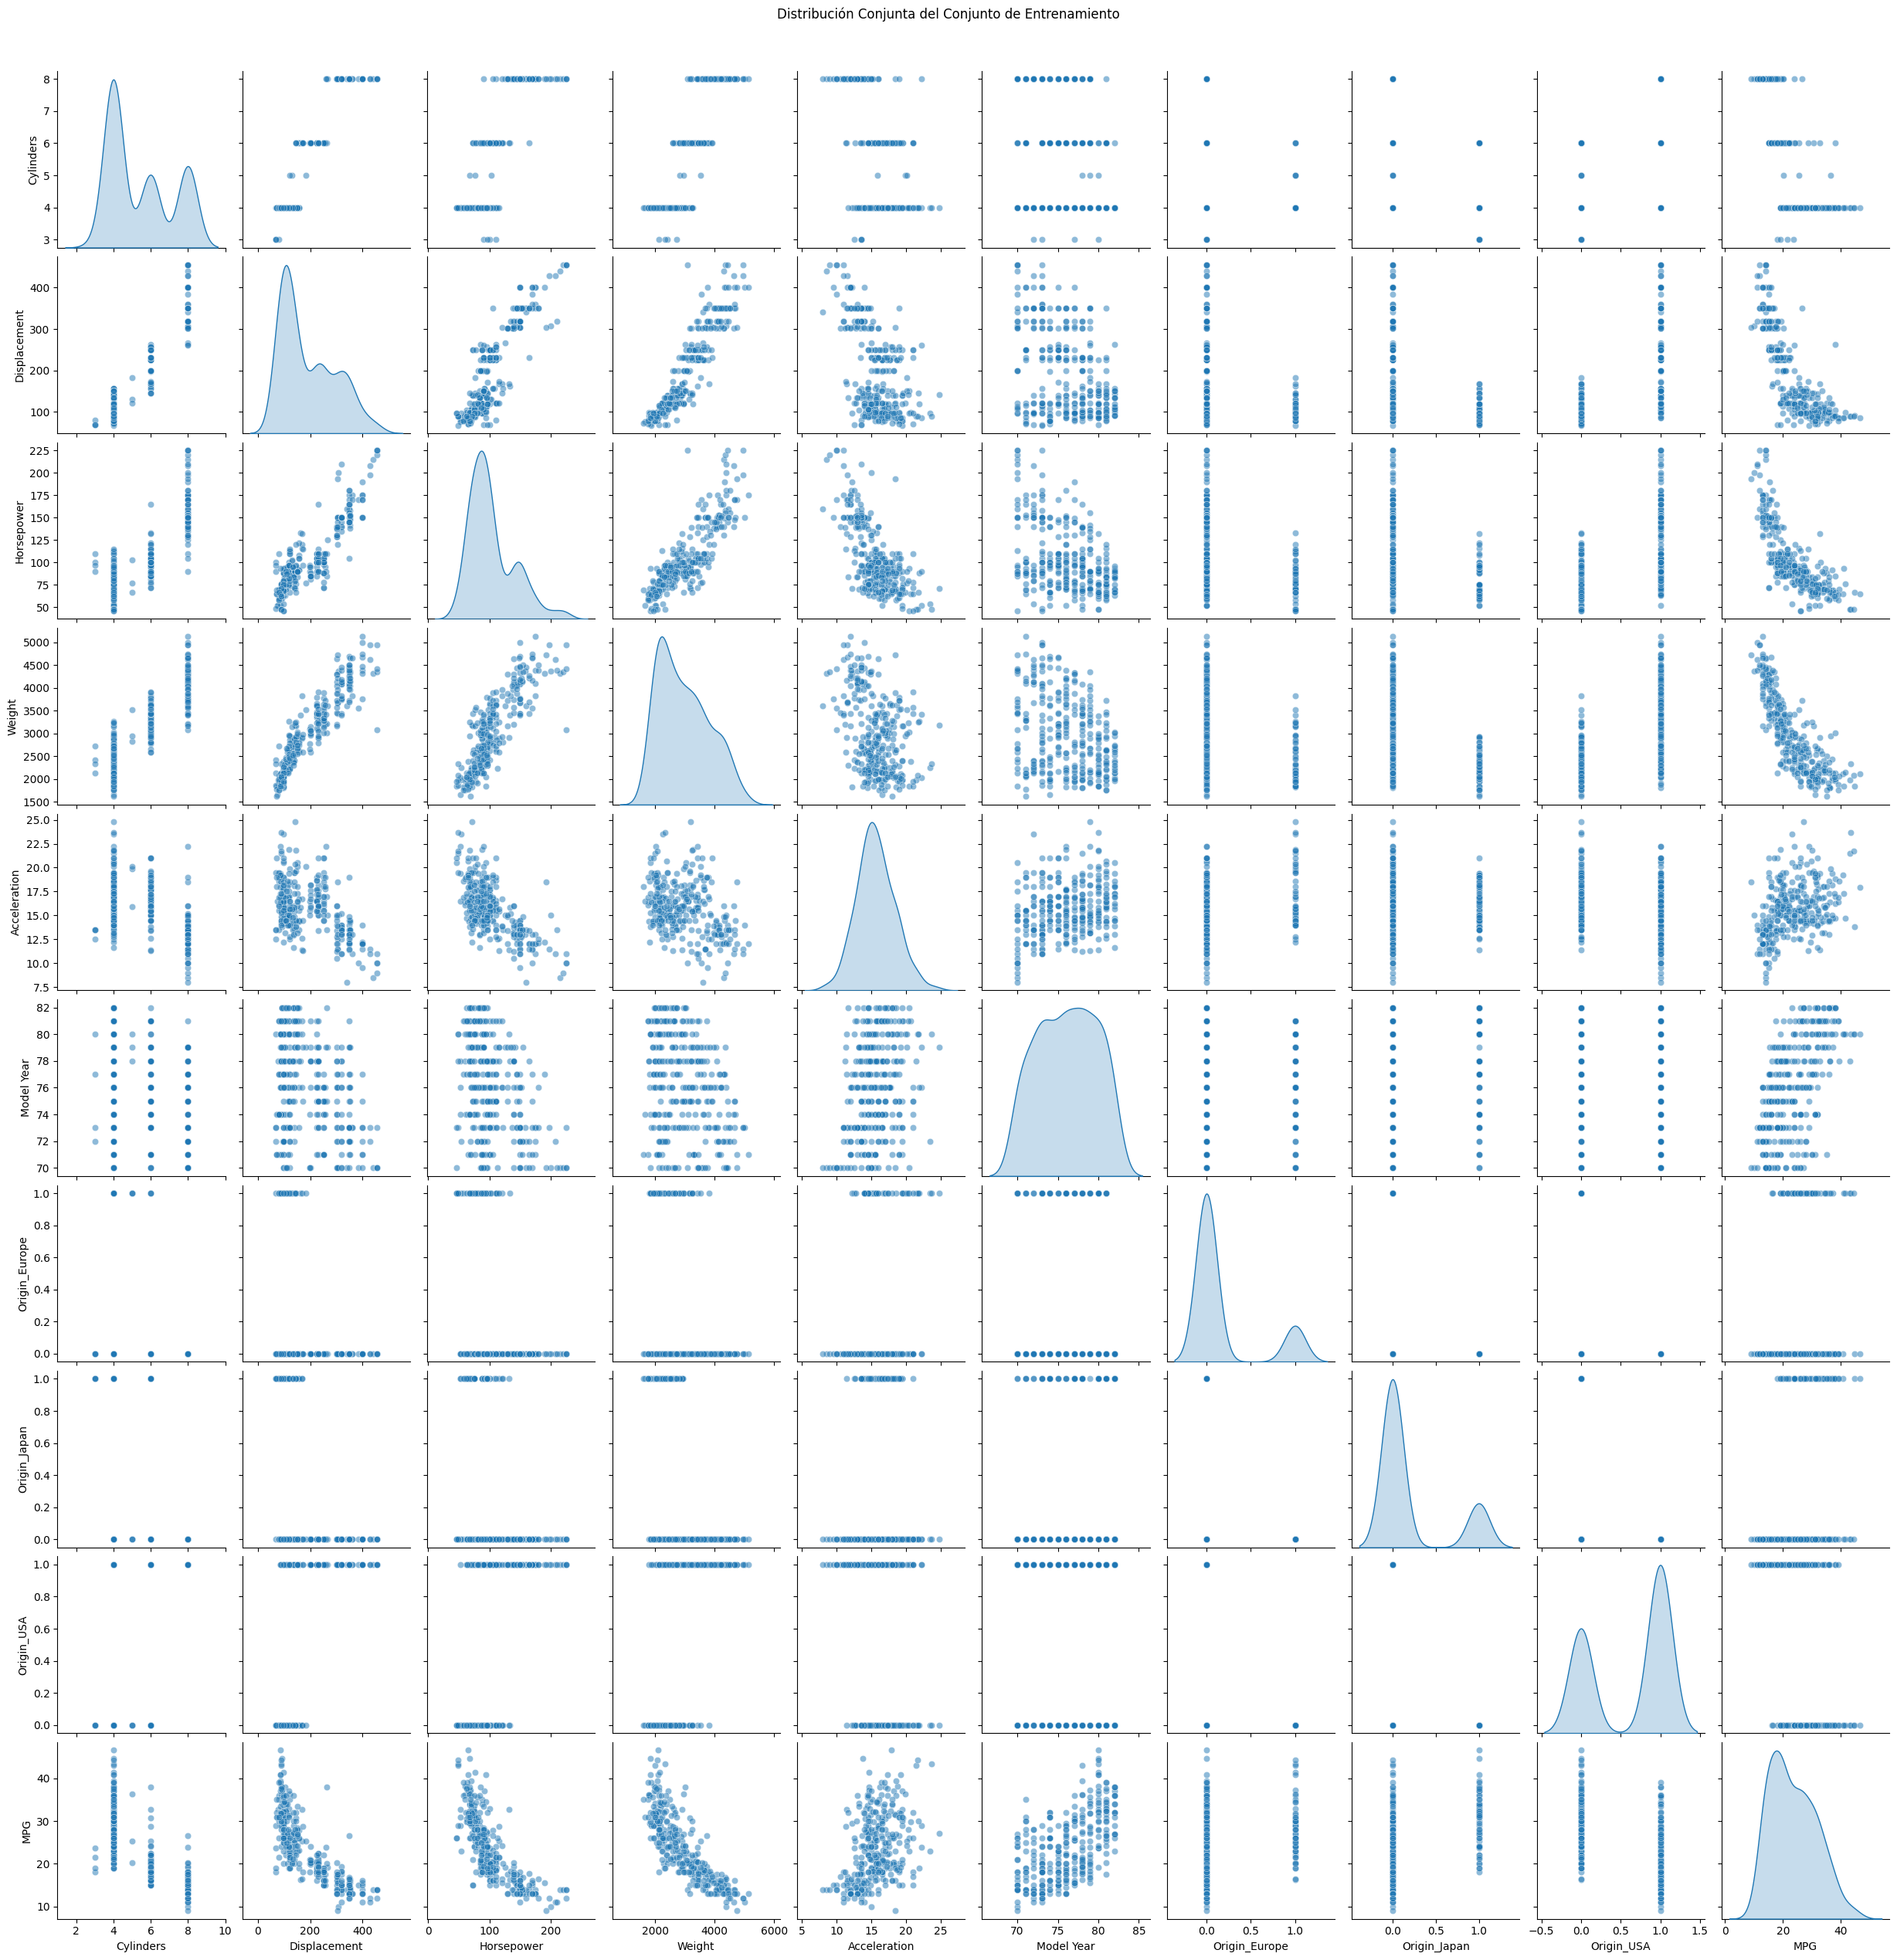

In [16]:
# Creamos un grid de gráficos para inspeccionar la distribución conjunta.

#Usamos el conjunto de entrenamiento.
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(train_dataset, diag_kind='kde', plot_kws={'alpha': 0.5})

#Título del gráfico
plt.suptitle('Distribución Conjunta del Conjunto de Entrenamiento', y=1.02)

#Mostramos el gráfico
plt.show()

Tambien revise las estadisticas generales:

In [18]:
# Inspeccionamos las estadísticas generales del conjunto de entrenamiento.
print("Estadísticas descriptivas del conjunto de entrenamiento:")
train_dataset.describe()

Estadísticas descriptivas del conjunto de entrenamiento:


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,MPG
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,5.430818,191.904088,103.130503,2969.015723,15.639937,76.103774,23.608176
std,1.684947,102.983802,37.085324,840.617729,2.763269,3.603177,7.930574
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,98.500000,75.250000,2220.000000,13.900000,73.000000,17.500000
50%,4.000000,148.500000,92.500000,2822.500000,15.500000,76.000000,22.450000
75%,6.000000,259.500000,120.000000,3597.250000,17.300000,79.000000,29.725000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,46.600000


### Separa las features del target

Separe el target de las features.

In [19]:
#Separamos las características (features) y la variable objetivo (target)
X_train = train_dataset.drop('MPG', axis=1)  #las features exceptuando la variable objetivo.
y_train = train_dataset['MPG'] #target    

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [20]:
from sklearn.preprocessing import StandardScaler

#Inicializamos el StandardScaler
scaler = StandardScaler()

#Ajustamos y transformamos las características de entrenamiento.
X_train_scaled = scaler.fit_transform(X_train)

#transform (sin fit) para el de test.
X_test_scaled = scaler.transform(X_test)

#Convertimos a DataFrame para facilitar su uso posterior.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Mostramos las primeras filas de las características escaladas
print("Primeras filas de las características escaladas (X_train):")
X_train_scaled.head()

Primeras filas de las características escaladas (X_train):


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,1.527188,1.090196,1.265821,0.552826,-1.319334,-1.696667,-0.462321,-0.511766,0.788954
1,-0.850515,-0.922996,-0.408635,-0.999667,-0.413182,-1.696667,-0.462321,1.954017,-1.267500
2,-0.850515,-0.981350,-0.948782,-1.124772,0.927922,1.638975,-0.462321,1.954017,-1.267500
3,-0.850515,-0.981350,-1.164840,-1.392854,0.275493,0.527094,-0.462321,1.954017,-1.267500
4,-0.850515,-0.747936,-0.219583,-0.327675,-0.231952,-0.306816,2.163001,-0.511766,-1.267500


## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Definimos el modelo secuencial
modelo = keras.Sequential()

#Realizamos la capa de entrada con activación ReLU
modelo.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],))) # 64 neuronas en la primera capa

#Realizamos la capa oculta con activación ReLU
modelo.add(layers.Dense(32, activation='relu'))  #32 neuronas en la segunda capa

#Realizamos la capa de salida
modelo.add(layers.Dense(1))  # Una neurona para la salida

#Compilamos el modelo.
modelo.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

#Realizamos el resumen del modelo.
modelo.summary()

C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [22]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [23]:
#Entrenamos nuestro modelo
history = modelo.fit(X_train_scaled, y_train,
                    epochs=1000,
                    validation_split=0.2,
                    batch_size=32,
                    verbose=1)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 624.0751 - mae: 23.5992 - mse: 624.0751 - val_loss: 570.9951 - val_mae: 22.6609 - val_mse: 570.9951
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 550.3560 - mae: 22.0636 - mse: 550.3560 - val_loss: 533.3804 - val_mae: 21.8557 - val_mse: 533.3804
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 513.2095 - mae: 21.2320 - mse: 513.2095 - val_loss: 494.5502 - val_mae: 21.0022 - val_mse: 494.5502
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 488.0226 - mae: 20.7857 - mse: 488.0226 - val_loss: 454.1205 - val_mae: 20.0795 - val_mse: 454.1205
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 452.1560 - mae: 19.8290 - mse: 452.1560 - val_loss: 411.0034 - val_mae: 19.0533 - val_mse: 411.0034
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 404.7252 - mae: 18.6998 - mse: 404.7252 - val_loss: 365.0212 - val_mae: 17.8880 - val_mse: 365.0212
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

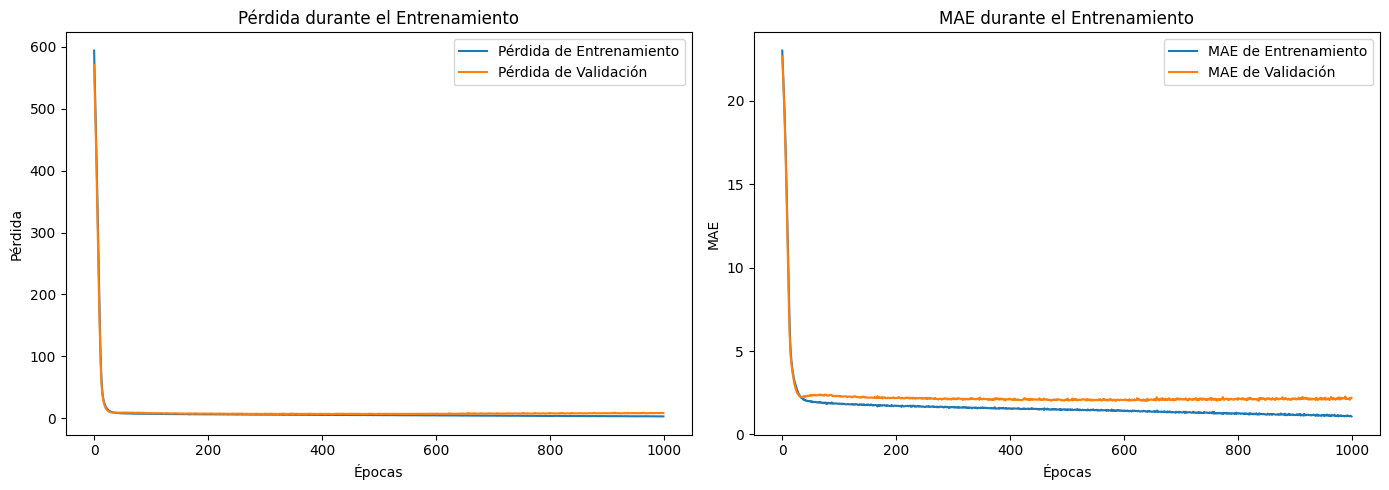

In [24]:
#Graficamos la pérdida durante el entrenamiento
plt.figure(figsize=(14, 5))

#Pérdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

#Realizamos el MAE durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.title('MAE durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

#Mostramos los gráficos
plt.tight_layout()
plt.show()

¿Alguna conclusión respecto a este gráfico?

Se visualiza una pérdida de entrenamiento, debido a una disminución constante. Esto indica que el modelo está aprendiendo y ajustándose a los datos de entrenamiento.

**MAE de Entrenamiento en Disminución**: Indica que el modelo mejora en sus predicciones para los datos de entrenamiento.

**MAE de Validación**: Un MAE bajo y decreciente sugiere buen rendimiento en datos no vistos, es más, un aumento en el MAE de validación indica sobreajuste.

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

Epoch 1/1000


C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 572.2662 - mae: 22.4982 - mse: 572.2662 - val_loss: 527.9631 - val_mae: 21.6556 - val_mse: 527.9631
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 523.6567 - mae: 21.4613 - mse: 523.6567 - val_loss: 480.1988 - val_mae: 20.5340 - val_mse: 480.1988
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 450.9429 - mae: 19.7902 - mse: 450.9429 - val_loss: 430.8502 - val_mae: 19.3259 - val_mse: 430.8502
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 427.4815 - mae: 19.1171 - mse: 427.4815 - val_loss: 379.8282 - val_mae: 18.0071 - val_mse: 379.8282
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 372.9469 - mae: 17.4907 - mse: 372.9469 - val_loss: 326.5949 - val_mae: 16.5213 - val_mse: 326.5949
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 329.4371 - mae: 16.3646 - mse: 329.4371 - val_loss: 273.1693 - val_mae: 14.8956 - val_mse: 273.1693
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 

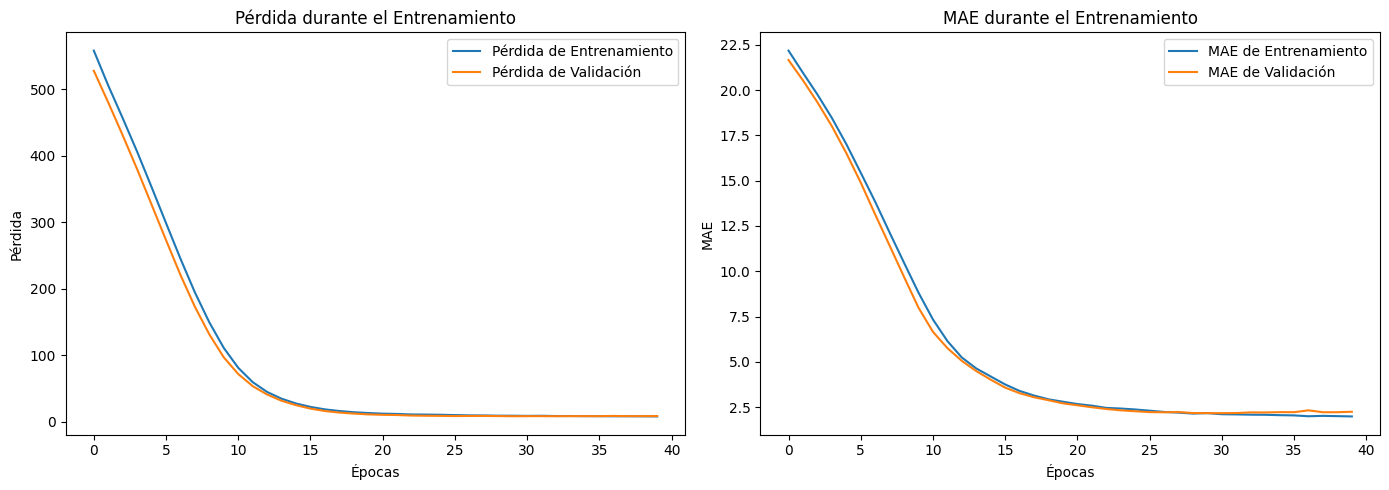

In [25]:
#Definimos el modelo secuencial (asegúrate de haberlo creado previamente)
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

#Compilamos el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

#Añadimos EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Entrenamos el modelo con Early Stopping
history = model.fit(X_train_scaled, y_train,
                    epochs=1000,
                    validation_split=0.2,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

#Graficamos la pérdida durante el entrenamiento
plt.figure(figsize=(14, 5))

#Pérdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

#MAE durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.title('MAE durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

#Mostramos gráficos
plt.tight_layout()
plt.show()

Interpreta el gráfico

Pérdida de Entrenamiento:
Una disminución constante indica que el modelo está aprendiendo bien.
Si la pérdida de validación también disminuye, sugiere buena generalización.

Divergencia:
Si la pérdida de validación aumenta mientras la pérdida de entrenamiento sigue disminuyendo, esto indica sobreajuste (overfitting).

MAE (Error Absoluto Medio):
Un MAE en disminución en ambos conjuntos (entrenamiento y validación) sugiere que el modelo mejora sus predicciones.
Un aumento en el MAE de validación indica problemas de generalización

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [26]:
#Evaluamos el modelo usando el conjunto de prueba
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=1)

# Mostrar los resultados de la evaluación
print(f'Pérdida en el conjunto de prueba: {test_loss:.4f}')
print(f'MAE en el conjunto de prueba: {test_mae:.4f}')
print(f'MSE en el conjunto de prueba: {test_mse:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5940 - mae: 1.8000 - mse: 5.5940 
Pérdida en el conjunto de prueba: 5.3566
MAE en el conjunto de prueba: 1.7697
MSE en el conjunto de prueba: 5.3566


Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.evaluate`.

In [29]:
import numpy as np

#Seleccionamos aleatoriamente 10 índices del conjunto de prueba
indices = np.random.choice(X_test_scaled.index, size=10, replace=False)

#Usamos .iloc para seleccionar las filas correspondientes
X_test_sample = X_test_scaled.iloc[indices]
y_test_sample = y_test.iloc[indices]

#Evaluamos el modelo usando los 10 ejemplos seleccionados
sample_loss, sample_mae, sample_mse = model.evaluate(X_test_sample, y_test_sample, verbose=1)

#Mostramos los resultados de la evaluación
print(f'Pérdida en el conjunto de prueba (muestra): {sample_loss:.4f}')
print(f'MAE en el conjunto de prueba (muestra): {sample_mae:.4f}')
print(f'MSE en el conjunto de prueba (muestra): {sample_mse:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.1188 - mae: 1.5317 - mse: 4.1188
Pérdida en el conjunto de prueba (muestra): 4.1188
MAE en el conjunto de prueba (muestra): 1.5317
MSE en el conjunto de prueba (muestra): 4.1188


### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


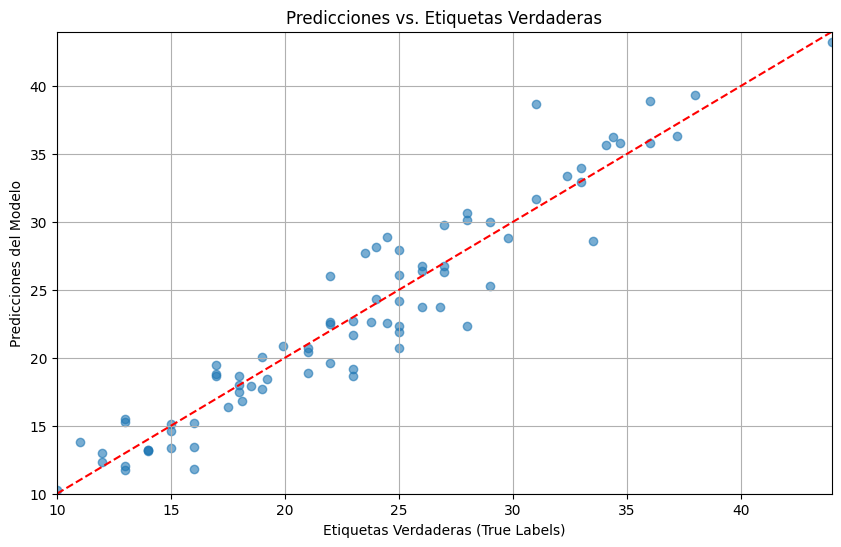

In [30]:
#Hacemos predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

#Creamos un scatter plot de las predicciones vs. las etiquetas verdaderas
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.title('Predicciones vs. Etiquetas Verdaderas')
plt.xlabel('Etiquetas Verdaderas (True Labels)')
plt.ylabel('Predicciones del Modelo')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid(True)
plt.show()

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

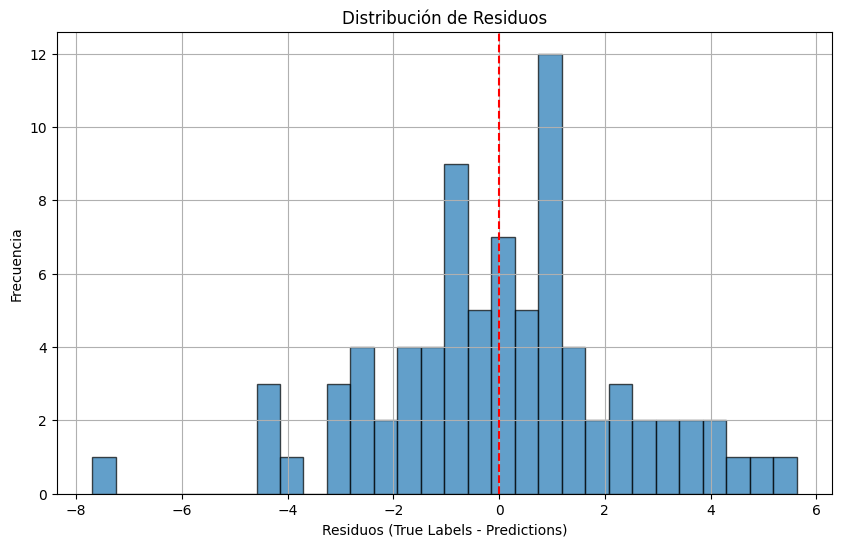

In [31]:
#Calculamos los residuos
residuals = y_test - predictions.flatten()

#Creamos un histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos (True Labels - Predictions)')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en 0
plt.grid(True)
plt.show()

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [32]:
# Guardamos el modelo en un archivo
model.save('modelo_auto_mpg.h5')